In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

In [96]:
def load_masterfile(path:str)->pd.DataFrame:
  df = pd.read_csv(path)
  df.drop(columns=['Unnamed: 0'], inplace=True)
  print("Original dataframe shape:", df.shape)
  return df

def remove_duplicate(dataframe:pd.DataFrame)->pd.DataFrame:
    df_nodupes = dataframe.drop_duplicates(keep='last')
    print("\nDeleted duplicate:", dataframe.shape[0] - df_nodupes.shape[0])
    print(f"Shape after with no duplicate: {df_nodupes.shape[0]}")
    
    return df_nodupes

def remove_file_indicator(dataframe:pd.DataFrame)->pd.DataFrame:
    dataframe.drop(columns=["path_label", "scenario"], inplace=True)
    print(f"{dataframe.columns}")
    return dataframe

def clean_validentry(dataframe:pd.DataFrame)->pd.DataFrame:
    ## check original dataframe
    print(f"shape before cleaning: {dataframe.shape[0]}")
    valid_entry = dataframe.query('Entry == 1')
    
    ## check dataframe after cleaning
    print(f"shape after cleaning: {valid_entry.shape[0]}")
    valid_entry.drop(columns=['Entry'], inplace=True)
    print(f"{valid_entry.columns}")
    
    return valid_entry

def fit_scaler(data):

  scaler = StandardScaler()

  std_scaler = scaler.fit(data)

  return std_scaler


def transform_scaler(data, scaler):

    scaled_data = scaler.transform(data)

    scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

    return scaled_df

def serialize_data(data, path:str):
    with open(path, "wb") as f:
        pickle.dump(data, f)
        

In [26]:
masterfile_path = r"E:\01_Programming\Py\MasterThesis_CUDA\dataset\MasterFile\MasterFile_1956.csv"

In [27]:
intact_file = load_masterfile(masterfile_path)

Original dataframe shape: (3731, 13)


In [32]:
df_unique = remove_duplicate(intact_file)


Deleted duplicate: 360
Shape after with no duplicate: 3371


In [33]:
df_unique.columns

Index(['bins_0_75', 'bins_1_75', 'bins_2_75', 'bins_3_75', 'bins_4_75',
       'bins_5_75', 'bins_6_75', 'bins_7_75', 'Entry', 'Exit', 'path_label',
       'outcome', 'scenario'],
      dtype='object')

In [34]:
df_unique.head(10)

,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75,Entry,Exit,path_label,outcome,scenario
0,325.0,30.0,2.0,3.0,2.0,0.0,1.0,20.0,1,1,40-30,1,org_sc1
1,0.0,1.0,97.0,2974.0,20.0,1.0,1.0,9.0,1,0,40-30,1,org_sc1
2,386.0,30.0,2.0,2.0,2.0,0.0,1.0,20.0,1,1,42-30,1,org_sc1
3,0.0,2.0,91.0,2957.0,16.0,1.0,2.0,16.0,1,0,42-30,1,org_sc1
4,219.0,182.0,2.0,3.0,2.0,0.0,1.0,21.0,1,1,44-32,1,org_sc1
5,0.0,4.0,60.0,3049.0,15.0,4.0,4.0,12.0,1,0,44-32,1,org_sc1
6,151.0,204.0,2.0,3.0,1.0,0.0,0.0,20.0,1,1,46-34,1,org_sc1
7,6.0,75.0,53.0,3359.0,16.0,0.0,1.0,7.0,1,0,46-34,1,org_sc1
8,3.0,807.0,50.0,3727.0,12.0,0.0,0.0,2.0,1,0,48-36,1,org_sc1
9,81.0,263.0,506.0,18.0,2.0,0.0,1.0,21.0,1,0,48-36,1,org_sc1


### Clean misc features

this step involve: 
1. removing the following features: path_label, scenario
2. clean invalid data with no Entry ("Entry" == 0)
3. Return the cleaned dataframe

In [38]:
df_unique.describe().round(2)

,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75,Entry,Exit,outcome
count,3371.00,3371.00,3371.00,3371.00,3371.00,3371.00,3371.00,3371.00,3371.00,3371.00,3371.00
mean,680.39,265.86,154.05,2789.51,902.21,3.37,3.23,127.00,0.99,0.61,0.48
std,1119.35,672.76,368.04,3650.37,3142.39,13.91,11.00,444.62,0.09,0.49,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,3.00,4.00,4.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00
50%,71.00,32.00,26.00,1584.00,7.00,1.00,1.00,11.00,1.00,1.00,0.00
75%,1067.00,183.00,154.00,4051.00,23.50,2.00,2.00,23.00,1.00,1.00,1.00
max,7510.00,7768.00,4909.00,16697.00,18426.00,248.00,226.00,3045.00,1.00,1.00,1.00


In [41]:
df_unique = remove_file_indicator(df_unique)

Index(['bins_0_75', 'bins_1_75', 'bins_2_75', 'bins_3_75', 'bins_4_75',
       'bins_5_75', 'bins_6_75', 'bins_7_75', 'Entry', 'Exit', 'outcome'],
      dtype='object')


C:\Users\Andreas Aditya\AppData\Local\Temp\ipykernel_94240\4137383933.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.drop(columns=["path_label", "scenario"], inplace=True)


In [45]:
df_unique = clean_validentry(df_unique)

shape before cleaning: 3371
shape after cleaning: 3345
Index(['bins_0_75', 'bins_1_75', 'bins_2_75', 'bins_3_75', 'bins_4_75',
       'bins_5_75', 'bins_6_75', 'bins_7_75', 'Exit', 'outcome'],
      dtype='object')


C:\Users\Andreas Aditya\AppData\Local\Temp\ipykernel_94240\2115799833.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_entry.drop(columns=['Entry'], inplace=True)


# Eploratory Data Analysis

<Axes: >

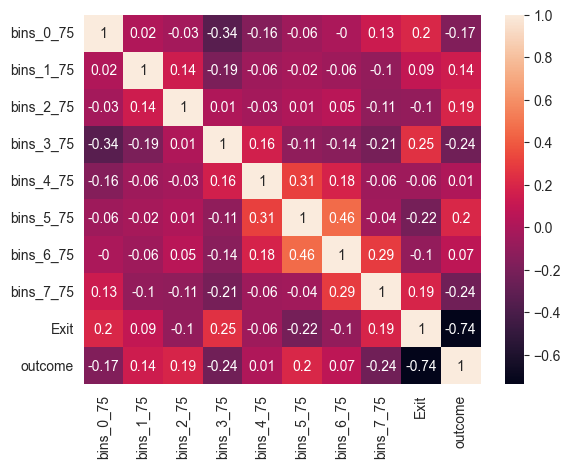

In [46]:
df_corr = df_unique.corr()
sns.heatmap(round(df_corr,2), annot=True)

show class balance 

Text(0.5, 1.0, 'Count of Class Instances with Minor-Major Ratio (0.48)')

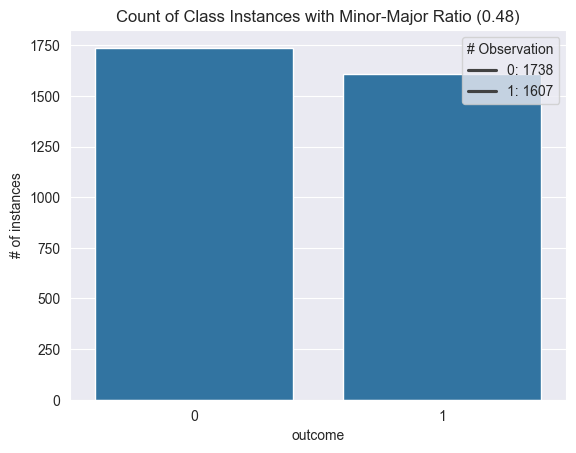

In [47]:
target_counts = df_unique['outcome'].value_counts()

sns.barplot(x=target_counts.index, y=target_counts.values)
ratio= []
labels = []

for i, count in zip(target_counts.index, target_counts.values):
    labels.append(f'{i}: {count}')
    num_str = labels[i][3:]
    num = int(num_str)
    ratio.append(num)

cls_ratio = round(min(ratio) / df_unique.shape[0], 2)
plt.legend(title="# Observation", labels=labels)
plt.ylabel("# of instances")
plt.title(f"Count of Class Instances with Minor-Major Ratio ({cls_ratio})")

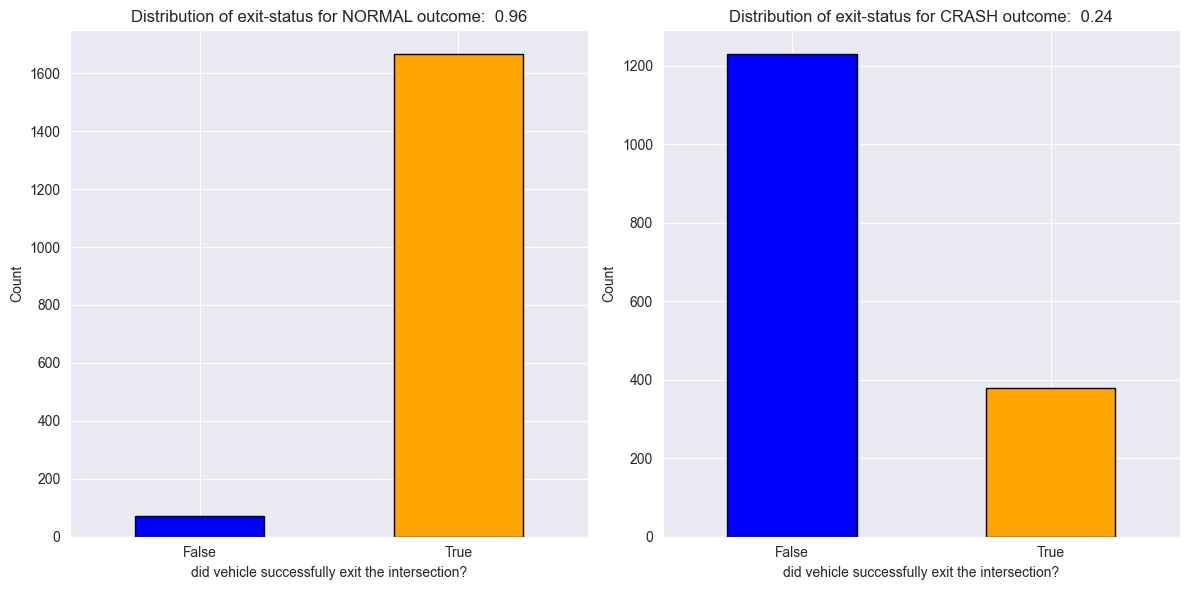

In [73]:
# Filter data where Outcome is 1
crash_outcome = df_unique[df_unique['outcome'] == 1]
normal_outcome = df_unique[df_unique['outcome'] == 0]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, ax in enumerate(axes):
    
    ## Define condition to display
    condition = df_unique[df_unique['outcome'] == i]
    condition['Exit'].value_counts().sort_index().plot(kind='bar', ax=ax, color=['blue', 'orange'], edgecolor='black')
    
    ## calculate exit-ratio 
    exit_ratio = condition.query("Exit == 1").shape[0] / condition.shape[0]
    ax.set_title(f'Distribution of exit-status for {"NORMAL" if i==0 else "CRASH"} outcome:  {round(exit_ratio, 2)}')
    ax.set_xlabel('did vehicle successfully exit the intersection?')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['False', 'True'], rotation=360)

# Adjust layout
plt.tight_layout()
plt.show()

Check data before scaling

In [74]:
df_unique.describe()

,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75,Exit,outcome
count,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000
mean,675.751570,267.563827,155.052317,2806.184753,908.983857,3.377877,3.246039,127.772197,0.610762,0.480419
std,1119.813725,675.045090,369.271844,3657.867358,3153.635208,13.964458,11.046072,446.256983,0.487650,0.499691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,4.000000,4.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,69.000000,32.000000,26.000000,1604.000000,7.000000,1.000000,1.000000,11.000000,1.000000,0.000000
75%,1048.000000,185.000000,156.000000,4070.000000,24.000000,2.000000,2.000000,23.000000,1.000000,1.000000
max,7510.000000,7768.000000,4909.000000,16697.000000,18426.000000,248.000000,226.000000,3045.000000,1.000000,1.000000


In [75]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3345 entries, 0 to 3730
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bins_0_75  3345 non-null   float64
 1   bins_1_75  3345 non-null   float64
 2   bins_2_75  3345 non-null   float64
 3   bins_3_75  3345 non-null   float64
 4   bins_4_75  3345 non-null   float64
 5   bins_5_75  3345 non-null   float64
 6   bins_6_75  3345 non-null   float64
 7   bins_7_75  3345 non-null   float64
 8   Exit       3345 non-null   int64  
 9   outcome    3345 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 287.5 KB


In [76]:
df_unique.head(10)

,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75,Exit,outcome
0,325.0,30.0,2.0,3.0,2.0,0.0,1.0,20.0,1,1
1,0.0,1.0,97.0,2974.0,20.0,1.0,1.0,9.0,0,1
2,386.0,30.0,2.0,2.0,2.0,0.0,1.0,20.0,1,1
3,0.0,2.0,91.0,2957.0,16.0,1.0,2.0,16.0,0,1
4,219.0,182.0,2.0,3.0,2.0,0.0,1.0,21.0,1,1
5,0.0,4.0,60.0,3049.0,15.0,4.0,4.0,12.0,0,1
6,151.0,204.0,2.0,3.0,1.0,0.0,0.0,20.0,1,1
7,6.0,75.0,53.0,3359.0,16.0,0.0,1.0,7.0,0,1
8,3.0,807.0,50.0,3727.0,12.0,0.0,0.0,2.0,0,1
9,81.0,263.0,506.0,18.0,2.0,0.0,1.0,21.0,0,1


# Split Train Valid Test data

define input

In [79]:
X = df_unique.drop("outcome", axis=1)
X.describe()

,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75,Exit
count,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000
mean,675.751570,267.563827,155.052317,2806.184753,908.983857,3.377877,3.246039,127.772197,0.610762
std,1119.813725,675.045090,369.271844,3657.867358,3153.635208,13.964458,11.046072,446.256983,0.487650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,4.000000,4.000000,2.000000,0.000000,0.000000,1.000000,0.000000
50%,69.000000,32.000000,26.000000,1604.000000,7.000000,1.000000,1.000000,11.000000,1.000000
75%,1048.000000,185.000000,156.000000,4070.000000,24.000000,2.000000,2.000000,23.000000,1.000000
max,7510.000000,7768.000000,4909.000000,16697.000000,18426.000000,248.000000,226.000000,3045.000000,1.000000


define output

In [82]:
y = df_unique['outcome']
y.describe()

count    3345.000000
mean        0.480419
std         0.499691
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: outcome, dtype: float64

### Split train valid test

In [83]:
 # first batch Train and temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y,test_size=0.2,
                                                              random_state=123)
  
 # first batch Train and temp
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp,test_size=0.5,
                                                              random_state=123)

Data Validation

In [84]:
# print out result
print(f"X train shape:{X_train.shape} with portion of {round(len(X_train) / len(X),4)}")
print(f"y train shape:{y_train.shape} with portion of {round(len(y_train) / len(y),4)}")
print("")

print(f"X valid shape: {X_valid.shape} with portion of {round(len(X_valid) / len(X),4)}")
print(f"y valid shape: {y_valid.shape} with portion of {round(len(y_valid) / len(y),4)}")
print("")

print(f"X test  shape: {X_test.shape} with portion of {round(len(X_test) / len(X),4)}")
print(f"y test  shape: {y_test.shape} with portion of {round(len(y_test) / len(y),4)}")

X train shape:(2676, 9) with portion of 0.8
y train shape:(2676,) with portion of 0.8

X valid shape: (334, 9) with portion of 0.0999
y valid shape: (334,) with portion of 0.0999

X test  shape: (335, 9) with portion of 0.1001
y test  shape: (335,) with portion of 0.1001


#### Train data validation

In [85]:
X_train.describe()

,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75,Exit
count,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000
mean,675.838939,265.953288,163.078475,2796.622197,897.276532,3.343423,3.248879,126.027653,0.610239
std,1124.011624,655.008504,390.772481,3624.836164,3118.025808,13.886313,11.206344,443.107711,0.487787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,4.000000,4.000000,2.000000,0.000000,0.000000,1.000000,0.000000
50%,69.000000,34.000000,27.500000,1612.500000,7.000000,1.000000,1.000000,10.000000,1.000000
75%,1041.000000,193.250000,164.000000,4070.000000,24.000000,2.000000,2.000000,23.000000,1.000000
max,7510.000000,7768.000000,4909.000000,16697.000000,18426.000000,248.000000,226.000000,3045.000000,1.000000


In [86]:
X_train.head(5)

,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75,Exit
119,0.0,0.0,5.0,13479.0,7.0,1.0,1.0,0.0,1
2836,2306.0,179.0,340.0,2132.0,3.0,0.0,0.0,2.0,1
353,142.0,106.0,2.0,2.0,3.0,1.0,1.0,16.0,1
2024,907.0,7.0,2.0,4.0,3.0,1.0,2.0,1344.0,1
48,254.0,27.0,3.0,3.0,1.0,0.0,1.0,22.0,1


In [97]:
serialize_data(X_train, r"E:\01_Programming\Py\dataframe_transform\modelling_data\X_train.pkl")

In [87]:
y_train.head()

119     0
2836    0
353     0
2024    0
48      0
Name: outcome, dtype: int64

In [98]:
serialize_data(y_train, r"E:\01_Programming\Py\dataframe_transform\modelling_data\y_train.pkl")


#### Valid data validation

In [88]:
X_valid.describe()

,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75,Exit
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.00000,334.000000
mean,690.377246,262.601796,120.392216,2603.931138,1198.562874,3.568862,3.832335,166.38024,0.583832
std,1083.614695,764.427470,249.202738,3566.316570,3672.210383,14.746091,12.470098,515.73942,0.493662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,4.000000,4.000000,4.000000,2.250000,0.000000,0.000000,1.00000,0.000000
50%,91.000000,32.000000,22.000000,371.000000,6.500000,1.000000,1.000000,13.00000,1.000000
75%,1136.750000,175.000000,117.500000,3705.500000,25.000000,2.000000,2.000000,24.00000,1.000000
max,5467.000000,7585.000000,1764.000000,15017.000000,18244.000000,190.000000,136.000000,2525.00000,1.000000


In [89]:
X_valid.head(5)

,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75,Exit
3299,2349.0,107.0,320.0,2239.0,22.0,0.0,0.0,0.0,1
2494,1298.0,189.0,351.0,1684.0,4.0,0.0,0.0,1.0,1
2232,1816.0,9.0,2.0,3.0,2.0,0.0,1.0,2485.0,1
2227,1.0,2.0,62.0,7249.0,93.0,2.0,1.0,3.0,1
1892,1168.0,9.0,2.0,4.0,3.0,1.0,2.0,1543.0,1


In [90]:
y_valid.head(5)

3299    0
2494    0
2232    0
2227    0
1892    0
Name: outcome, dtype: int64

In [99]:
serialize_data(X_valid, r"E:\01_Programming\Py\dataframe_transform\modelling_data\X_valid.pkl")
serialize_data(y_valid, r"E:\01_Programming\Py\dataframe_transform\modelling_data\y_valid.pkl")

#### Test data validation

In [91]:
X_test.describe()

,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75,Exit
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,660.471642,285.376119,125.495522,3084.220896,713.788060,3.462687,2.638806,103.214925,0.641791
std,1124.778753,737.027727,278.825476,3990.858309,2853.301483,13.826695,7.751240,392.438776,0.480191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,3.500000,4.000000,2.000000,0.000000,0.000000,1.000000,0.000000
50%,64.000000,19.000000,24.000000,1779.000000,5.000000,1.000000,1.000000,11.000000,1.000000
75%,931.500000,163.000000,120.000000,4726.500000,22.500000,2.000000,2.000000,22.000000,1.000000
max,5705.000000,5528.000000,3148.000000,15840.000000,16861.000000,155.000000,91.000000,2442.000000,1.000000


In [92]:
X_test.head(5)

,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75,Exit
3425,0.0,1.0,264.0,3368.0,5.0,0.0,0.0,0.0,0
1948,1119.0,7.0,3.0,4.0,4.0,2.0,2.0,1600.0,1
844,64.0,1786.0,4.0,5.0,2.0,1.0,1.0,20.0,1
86,0.0,135.0,521.0,3921.0,8.0,0.0,1.0,1.0,0
335,218.0,22.0,1.0,3.0,3.0,1.0,1.0,21.0,1


In [93]:
y_test.head(5)

3425    1
1948    0
844     0
86      1
335     0
Name: outcome, dtype: int64

In [100]:
serialize_data(X_test, r"E:\01_Programming\Py\dataframe_transform\modelling_data\X_test.pkl")
serialize_data(y_test, r"E:\01_Programming\Py\dataframe_transform\modelling_data\y_test.pkl")

#### Data Scaling

In [101]:
scaler = fit_scaler(X_train)

X_train_scaled = transform_scaler(X_train, scaler)
X_valid_scaled = transform_scaler(X_valid, scaler)
X_test_scaled = transform_scaler(X_test, scaler)

In [103]:
X_train_scaled.describe().round(2)

,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75,Exit
count,2676.00,2676.00,2676.00,2676.00,2676.00,2676.00,2676.00,2676.00,2676.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.60,-0.41,-0.42,-0.77,-0.29,-0.24,-0.29,-0.28,-1.25
25%,-0.60,-0.40,-0.41,-0.77,-0.29,-0.24,-0.29,-0.28,-1.25
50%,-0.54,-0.35,-0.35,-0.33,-0.29,-0.17,-0.20,-0.26,0.80
75%,0.32,-0.11,0.00,0.35,-0.28,-0.10,-0.11,-0.23,0.80
max,6.08,11.46,12.15,3.84,5.62,17.62,19.88,6.59,0.80


In [104]:
X_valid_scaled.describe().round(2)


,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75,Exit
count,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00
mean,0.01,-0.01,-0.11,-0.05,0.10,0.02,0.05,0.09,-0.05
std,0.96,1.17,0.64,0.98,1.18,1.06,1.11,1.16,1.01
min,-0.60,-0.41,-0.42,-0.77,-0.29,-0.24,-0.29,-0.28,-1.25
25%,-0.60,-0.40,-0.41,-0.77,-0.29,-0.24,-0.29,-0.28,-1.25
50%,-0.52,-0.36,-0.36,-0.67,-0.29,-0.17,-0.20,-0.26,0.80
75%,0.41,-0.14,-0.12,0.25,-0.28,-0.10,-0.11,-0.23,0.80
max,4.26,11.18,4.10,3.37,5.56,13.44,11.85,5.41,0.80


In [105]:
X_test_scaled.describe().round(2)

,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75,Exit
count,335.00,335.00,335.00,335.00,335.00,335.00,335.00,335.00,335.00
mean,-0.01,0.03,-0.10,0.08,-0.06,0.01,-0.05,-0.05,0.06
std,1.00,1.13,0.71,1.10,0.92,1.00,0.69,0.89,0.98
min,-0.60,-0.41,-0.42,-0.77,-0.29,-0.24,-0.29,-0.28,-1.25
25%,-0.60,-0.40,-0.41,-0.77,-0.29,-0.24,-0.29,-0.28,-1.25
50%,-0.54,-0.38,-0.36,-0.28,-0.29,-0.17,-0.20,-0.26,0.80
75%,0.23,-0.16,-0.11,0.53,-0.28,-0.10,-0.11,-0.23,0.80
max,4.48,8.04,7.64,3.60,5.12,10.92,7.83,5.23,0.80


Index validation

In [110]:
print(X_train_scaled.head(5).index.to_list()) 
serialize_data(X_train_scaled, r"E:\01_Programming\Py\dataframe_transform\modelling_data\scaled\X_train_scaled.pkl")

print(y_train.head(5).index.to_list())

[119, 2836, 353, 2024, 48]
[119, 2836, 353, 2024, 48]


In [111]:
print(X_valid_scaled.head(5).index.to_list())
serialize_data(X_valid_scaled, r"E:\01_Programming\Py\dataframe_transform\modelling_data\scaled\X_valid_scaled.pkl")

print(y_valid.head(5).index.to_list())

[3299, 2494, 2232, 2227, 1892]
[3299, 2494, 2232, 2227, 1892]


In [112]:
print(X_test_scaled.head(5).index.to_list())
serialize_data(X_test_scaled, r"E:\01_Programming\Py\dataframe_transform\modelling_data\scaled\X_test_scaled.pkl")

print(y_test.head(5).index.to_list())

[3425, 1948, 844, 86, 335]
[3425, 1948, 844, 86, 335]


## OpFlow-Bins Only

Train set

In [115]:
X_train_scaled_bin = X_train_scaled

In [116]:
X_train_scaled_bin

,bins_0_75,bins_1_75,bins_2_75,bins_3_75,bins_4_75,bins_5_75,bins_6_75,bins_7_75
119,-0.601386,-0.406106,-0.404604,2.947547,-0.285579,-0.168789,-0.200717,-0.284471
2836,1.450577,-0.132776,0.452833,-0.183387,-0.286862,-0.240816,-0.289968,-0.279956
353,-0.475030,-0.244246,-0.412282,-0.771109,-0.286862,-0.168789,-0.200717,-0.248355
2024,0.205696,-0.395417,-0.412282,-0.770557,-0.286862,-0.168789,-0.111465,2.749219
48,-0.375368,-0.364878,-0.409723,-0.770833,-0.287504,-0.240816,-0.200717,-0.234812
...,...,...,...,...,...,...,...,...
2293,0.386332,0.826169,3.874900,-0.771385,-0.287504,-0.240816,-0.200717,-0.257384
3474,-0.601386,-0.406106,-0.379009,0.786494,-0.283975,-0.240816,-0.289968,-0.279956
1901,-0.600497,-0.404579,-0.340616,1.675252,-0.272427,-0.096762,-0.111465,-0.279956
1252,2.009395,-0.328230,-0.412282,-0.770557,-0.287504,-0.240816,-0.289968,-0.239327


In [117]:
serialize_data(X_train_scaled_bin, r"E:\01_Programming\Py\dataframe_transform\modelling_data\only_bins\X_train_scaled_bins.pkl")

valid set

In [118]:
X_valid_scaled_bin = X_valid_scaled.drop(columns=["Exit"])
X_valid_scaled_bin.columns

Index(['bins_0_75', 'bins_1_75', 'bins_2_75', 'bins_3_75', 'bins_4_75',
       'bins_5_75', 'bins_6_75', 'bins_7_75'],
      dtype='object')

In [119]:
serialize_data(X_valid_scaled_bin, r"E:\01_Programming\Py\dataframe_transform\modelling_data\only_bins\X_valid_scaled_bins.pkl")

test set

In [120]:
X_test_scaled_bin = X_test_scaled.drop(columns=["Exit"])
X_test_scaled_bin.columns

Index(['bins_0_75', 'bins_1_75', 'bins_2_75', 'bins_3_75', 'bins_4_75',
       'bins_5_75', 'bins_6_75', 'bins_7_75'],
      dtype='object')